<a href="https://colab.research.google.com/github/JeffersonBP/Aula-_JavascriptJeff/blob/main/BIG_A3_Classificacao_JeffersonBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 3**
## CASO: Controle de Qualidade de Peças de uma Indústria
### ALUNO: Jefferson Batista Pereira
---
<br>
<br>





A partir deste notebook você vai criar e avaliar diferentes modelos de classificação para prever a qualidade de peças de uma indústria.

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. (**dica**: o questionário é de alternativas e as respontas irão ajudá-lo a verificar os seus resultados ao longo do programa).

# Basic imports

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados



`pieces` é um data set para o controle de qualidade de peças produzidas por uma indústria. São empregadas quatro medidas (A, B, C e D) para o controle da qualidade das peças. As peças são então *Accept, Refurbish* ou *Reject* segundo o controle de qualidade (atributo `Quality`). A indústria ainda conta com 3 unidades para a produção dessas peças (atributo `Unit`).

**Objetivo:** Seu objetivo é criar modelos supervisionados de classificação para predição da qualidade das peças e empregar o melhor modelo obtido (maior acuracidade) na predição da qualidade de novos casos.



In [73]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/pieces1.csv')
df.head()

,id,A,B,C,D,Quality,Unit
0,559,4.9,3.1,1.5,0.1,Reject,SP
1,629,4.8,3.4,1.6,0.2,Reject,SP
2,192,6.7,2.5,5.8,1.8,Refurbish,RJ
3,359,7.6,3.0,6.6,2.1,Refurbish,RJ
4,9,4.9,3.1,1.5,0.1,Reject,RJ


## Inspecione os dados

    id    A    B    C    D    Quality Unit
0  559  4.9  3.1  1.5  0.1     Reject   SP
1  629  4.8  3.4  1.6  0.2     Reject   SP
2  192  6.7  2.5  5.8  1.8  Refurbish   RJ
3  359  7.6  3.0  6.6  2.1  Refurbish   RJ
4    9  4.9  3.1  1.5  0.1     Reject   RJ
             id           A           B           C           D
count  500.0000  500.000000  491.000000  494.000000  496.000000
mean   323.2080    5.829600    3.076782    3.787449    1.235282
std    187.5734    0.817227    0.434519    1.749994    0.772550
min      0.0000    4.300000    2.000000    1.000000    0.100000
25%    152.7500    5.100000    2.800000    1.600000    0.300000
50%    323.0000    5.850000    3.000000    4.400000    1.300000
75%    486.5000    6.400000    3.400000    5.100000    1.800000
max    648.0000    7.900000    4.400000    6.900000    2.500000


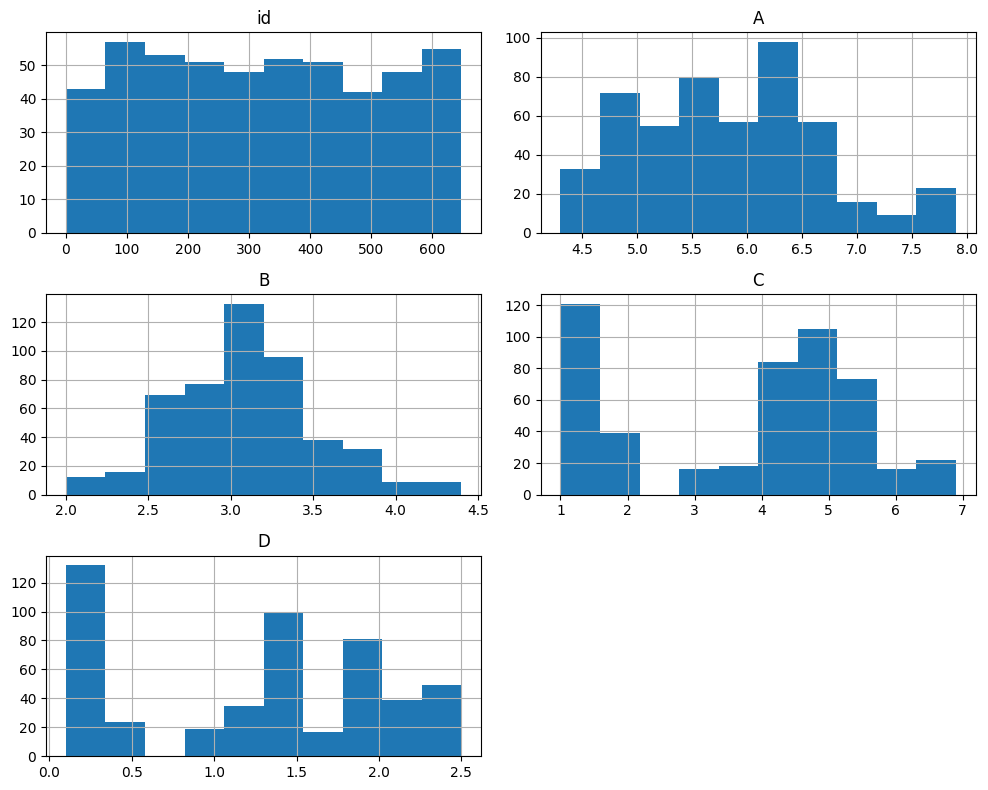

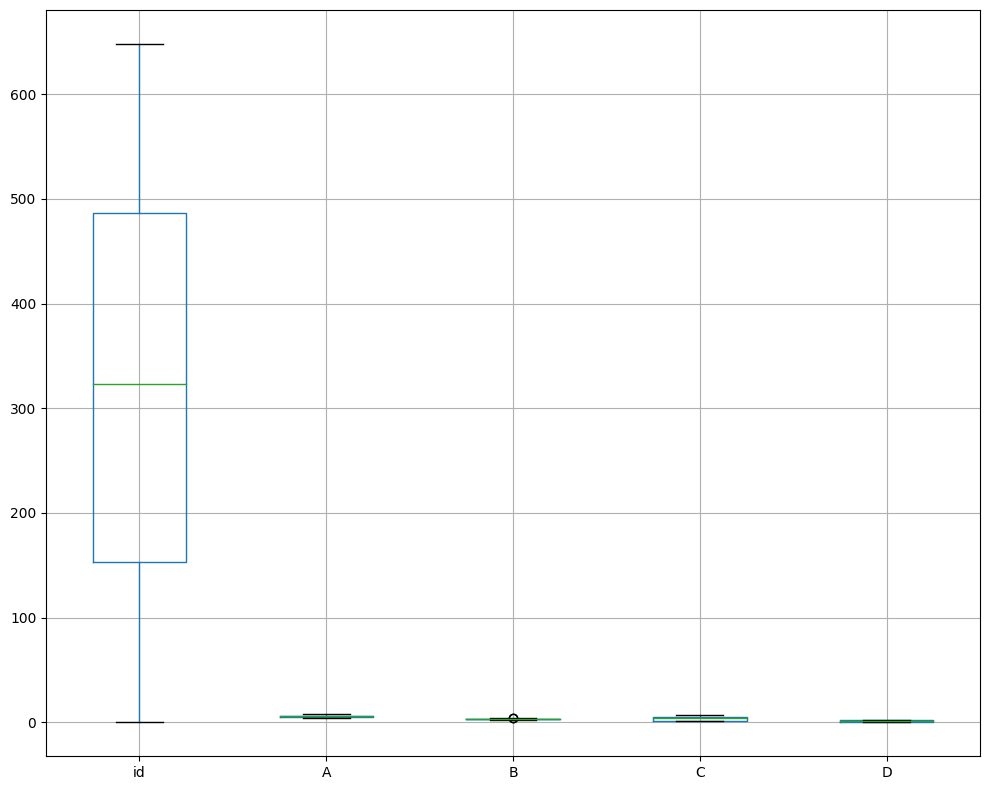

Refurbish    182
Reject       160
Accept       158
Name: Quality, dtype: int64
SP    224
BH    151
RJ    125
Name: Unit, dtype: int64


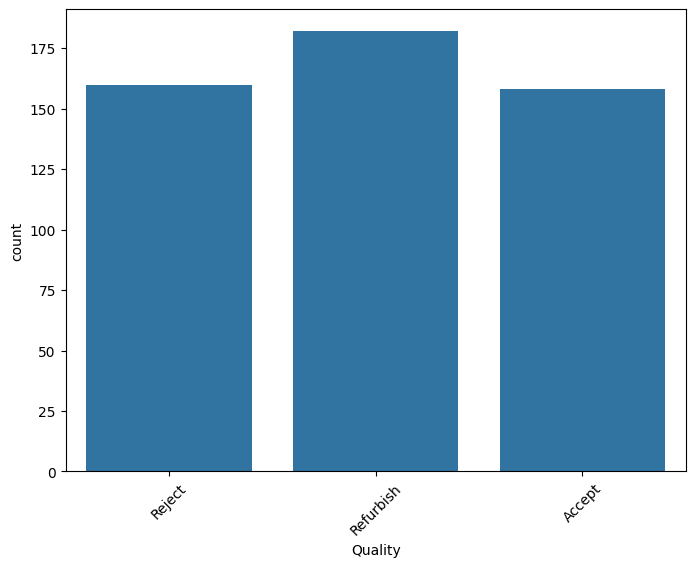

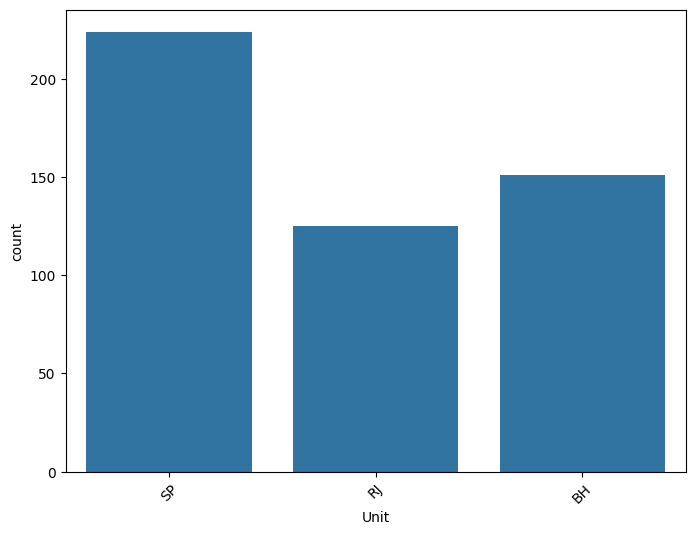

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos supor que você já tenha lido seu dataframe para a variável df

# Visualizar as primeiras linhas do dataframe
print(df.head())

# Resumo estatístico das variáveis numéricas
print(df.describe())

# Histogramas das variáveis numéricas
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplots das variáveis numéricas
df.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Contagem de valores das variáveis categóricas
for column in df.select_dtypes(include='object'):
    print(df[column].value_counts())

# Gráfico de barras das variáveis categóricas
for column in df.select_dtypes(include='object'):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.xticks(rotation=45)
    plt.show()


## Preparação dos dados

Aqui você vai preparar o dado para o uso nos modelos. Você fará a seleção de atributos, tratamento de valores nulos, o encode dos dados, normalização e a separação dos dados de treinamento e teste.

### Seleção de Atributos

Elimine atributos que não fazem parte do treinamento.

In [47]:
# Contando quantas linhas têm o ID repetido
#contagem_repetidos = df.duplicated(subset=['id']).sum()
#print("Número de linhas com ID repetido:", contagem_repetidos)

# Criando um novo DataFrame sem as linhas que contêm o mesmo ID
#df_sem_repetidos = df.drop_duplicates(subset=['id'], keep=False)
#print("===========================================================")
# Visualizando as primeiras linhas do novo DataFrame
#display(df_sem_repetidos)


In [75]:

# Criando um novo DataFrame sem a variável 'id'
df_sem_id = df.drop(columns=['id'])

# Visualizando as primeiras linhas do novo DataFrame
print(df_sem_id.head())
print("===========================================================")
# Resumo estatístico das variáveis numéricas
print(df_sem_id.describe())
print("===========================================================")
display(df_sem_id)

     A    B    C    D    Quality Unit
0  4.9  3.1  1.5  0.1     Reject   SP
1  4.8  3.4  1.6  0.2     Reject   SP
2  6.7  2.5  5.8  1.8  Refurbish   RJ
3  7.6  3.0  6.6  2.1  Refurbish   RJ
4  4.9  3.1  1.5  0.1     Reject   RJ
                A           B           C           D
count  500.000000  491.000000  494.000000  496.000000
mean     5.829600    3.076782    3.787449    1.235282
std      0.817227    0.434519    1.749994    0.772550
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.850000    3.000000    4.400000    1.300000
75%      6.400000    3.400000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


,A,B,C,D,Quality,Unit
0,4.9,3.1,1.5,0.1,Reject,SP
1,4.8,3.4,1.6,0.2,Reject,SP
2,6.7,2.5,5.8,1.8,Refurbish,RJ
3,7.6,3.0,6.6,2.1,Refurbish,RJ
4,4.9,3.1,1.5,0.1,Reject,RJ
...,...,...,...,...,...,...
495,4.6,3.6,1.0,0.2,Reject,SP
496,6.9,3.2,5.7,2.3,Refurbish,RJ
497,6.7,3.1,5.6,2.4,Refurbish,RJ
498,5.6,3.0,4.1,1.3,Accept,SP


### Tratamento de Dados Ausentes

Verifique as presença de valores ausentes e, se houverem, subtitua pelo valor médio dos atributos.

In [76]:
# TRATAMENTO DE DADOS AUSENTES

# Verificando a presença de valores ausentes
print("Valores ausentes antes do tratamento:")
print(df_sem_id.isnull().sum())

# Substituindo os valores ausentes pela média dos atributos
df_sem_id_preenchido = df_sem_id.fillna(df_sem_id.mean())

# Verificando novamente a presença de valores ausentes após o tratamento
print("\nValores ausentes após o tratamento:")
print(df_sem_id_preenchido.isnull().sum())


Valores ausentes antes do tratamento:
A          0
B          9
C          6
D          4
Quality    0
Unit       0
dtype: int64

Valores ausentes após o tratamento:
A          0
B          0
C          0
D          0
Quality    0
Unit       0
dtype: int64


<ipython-input-76-0021f995edca>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sem_id_preenchido = df_sem_id.fillna(df_sem_id.mean())


### Hot encode

Faça os *Hot Encodes* **necessários** dos dados. Lembre-se de verificar se de fato todos os dados categóricos precisam dessa transformação.

In [77]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
display(df_sem_id_preenchido)


# Instanciando o LabelEncoder
label_encoder = LabelEncoder()

# Transformando a variável 'Unit' em valores numéricos
df_sem_id_preenchido['Unit_encoded'] = label_encoder.fit_transform(df_sem_id_preenchido['Unit'])

# Instanciando o OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Realizando o One-Hot Encoding na variável 'Unit_encoded'
unit_encoded_onehot = onehot_encoder.fit_transform(df_sem_id_preenchido[['Unit_encoded']])

# Criando um DataFrame com as colunas do One-Hot Encoding
unit_encoded_df = pd.DataFrame(unit_encoded_onehot, columns=['Unit_' + str(i) for i in range(unit_encoded_onehot.shape[1])])
print('# Criando um DataFrame com as colunas do One-Hot Encoding')
display(unit_encoded_df)



# Resetando o índice do DataFrame original e removendo as colunas 'Unit' e 'Unit_encoded'
df_sem_id_preenchido_reset = df_sem_id_preenchido.reset_index(drop=True).drop(columns=['Unit', 'Unit_encoded'])

# Unindo os DataFrames utilizando o método .join() corretamente
df_com_hot_encoding2 = df_sem_id_preenchido_reset.join(unit_encoded_df)
print(' Visualizando as primeiras linhas do DataFrame após o Hot Encoding')
# Visualizando as primeiras linhas do DataFrame após o Hot Encoding
print(df_com_hot_encoding2.head())
print('Exibindo o DataFrame após o Hot Encoding')
# Exibindo o DataFrame após o Hot Encoding
display(df_com_hot_encoding2)



,A,B,C,D,Quality,Unit
0,4.9,3.1,1.5,0.1,Reject,SP
1,4.8,3.4,1.6,0.2,Reject,SP
2,6.7,2.5,5.8,1.8,Refurbish,RJ
3,7.6,3.0,6.6,2.1,Refurbish,RJ
4,4.9,3.1,1.5,0.1,Reject,RJ
...,...,...,...,...,...,...
495,4.6,3.6,1.0,0.2,Reject,SP
496,6.9,3.2,5.7,2.3,Refurbish,RJ
497,6.7,3.1,5.6,2.4,Refurbish,RJ
498,5.6,3.0,4.1,1.3,Accept,SP


# Criando um DataFrame com as colunas do One-Hot Encoding


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Unit_0,Unit_1,Unit_2
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
495,0.0,0.0,1.0
496,0.0,1.0,0.0
497,0.0,1.0,0.0
498,0.0,0.0,1.0


 Visualizando as primeiras linhas do DataFrame após o Hot Encoding
     A    B    C    D    Quality  Unit_0  Unit_1  Unit_2
0  4.9  3.1  1.5  0.1     Reject     0.0     0.0     1.0
1  4.8  3.4  1.6  0.2     Reject     0.0     0.0     1.0
2  6.7  2.5  5.8  1.8  Refurbish     0.0     1.0     0.0
3  7.6  3.0  6.6  2.1  Refurbish     0.0     1.0     0.0
4  4.9  3.1  1.5  0.1     Reject     0.0     1.0     0.0
Exibindo o DataFrame após o Hot Encoding


,A,B,C,D,Quality,Unit_0,Unit_1,Unit_2
0,4.9,3.1,1.5,0.1,Reject,0.0,0.0,1.0
1,4.8,3.4,1.6,0.2,Reject,0.0,0.0,1.0
2,6.7,2.5,5.8,1.8,Refurbish,0.0,1.0,0.0
3,7.6,3.0,6.6,2.1,Refurbish,0.0,1.0,0.0
4,4.9,3.1,1.5,0.1,Reject,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
495,4.6,3.6,1.0,0.2,Reject,0.0,0.0,1.0
496,6.9,3.2,5.7,2.3,Refurbish,0.0,1.0,0.0
497,6.7,3.1,5.6,2.4,Refurbish,0.0,1.0,0.0
498,5.6,3.0,4.1,1.3,Accept,0.0,0.0,1.0


### Normalize os dados

Normalize os dados com o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.


Média das variáveis normalizadas:
A        -1.119105e-16
B         3.552714e-16
C         2.131628e-17
D        -9.947598e-17
Unit_0   -2.842171e-17
Unit_1   -3.197442e-17
Unit_2    8.171241e-17
dtype: float64

Análise Exploratória do Novo DataFrame Normalizado:
                  A             B             C             D        Unit_0  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -1.119105e-16  3.552714e-16  2.131628e-17 -9.947598e-17 -2.842171e-17   
std    1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00  1.001002e+00   
min   -1.873570e+00 -2.503260e+00 -1.604102e+00 -1.476929e+00 -6.577726e-01   
25%   -8.936696e-01 -6.434520e-01 -1.258818e+00 -1.216742e+00 -6.577726e-01   
50%    2.498747e-02 -1.784999e-01  3.525064e-01  8.419362e-02 -6.577726e-01   
75%    6.986693e-01  7.514042e-01  7.553375e-01  7.346615e-01  1.520282e+00   
max    2.535983e+00  3.076165e+00  1.791189e+00  1.645316e+00  1.520282e+00   

             Unit_1     

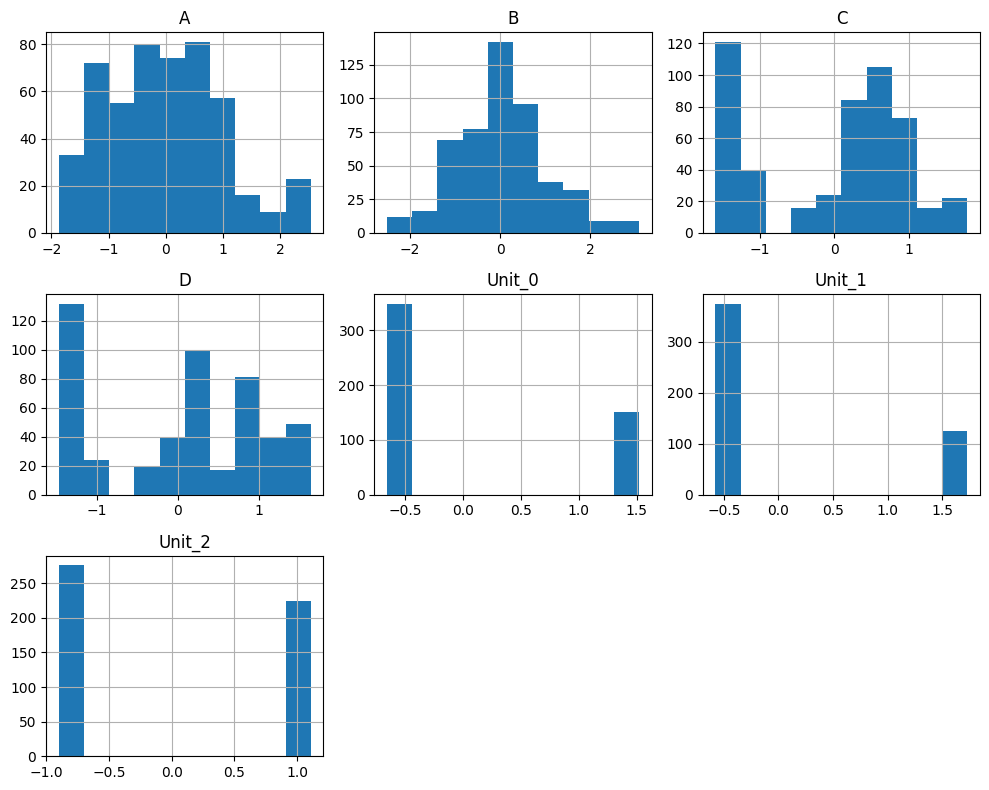

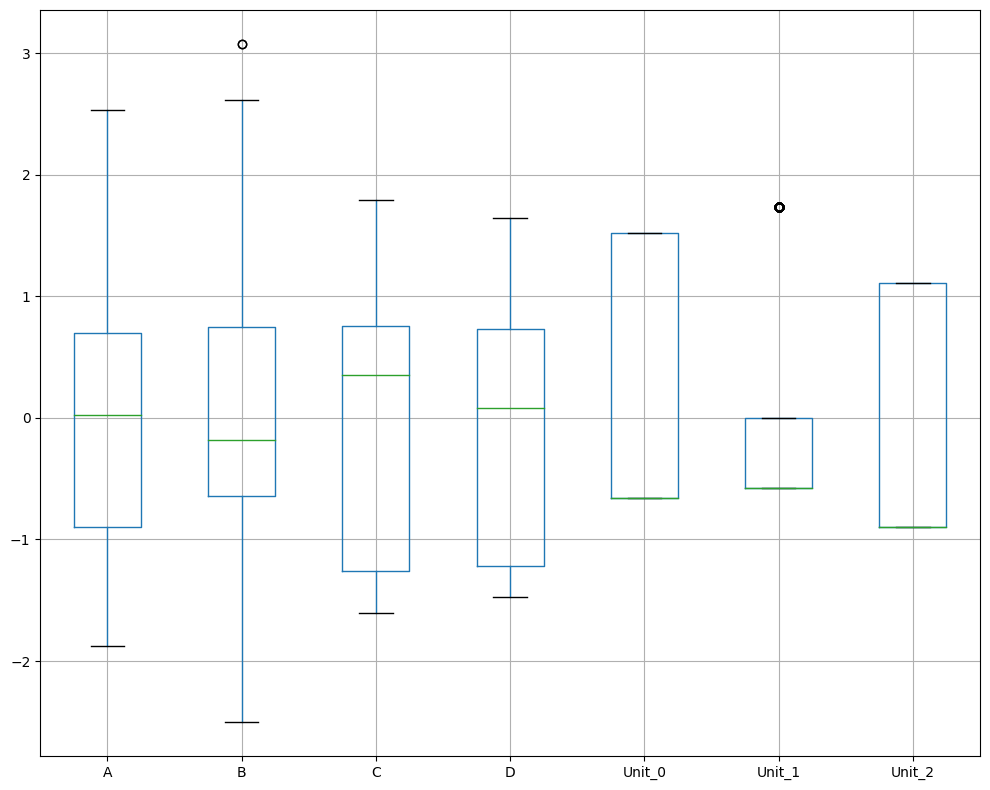

Refurbish    182
Reject       160
Accept       158
Name: Quality, dtype: int64


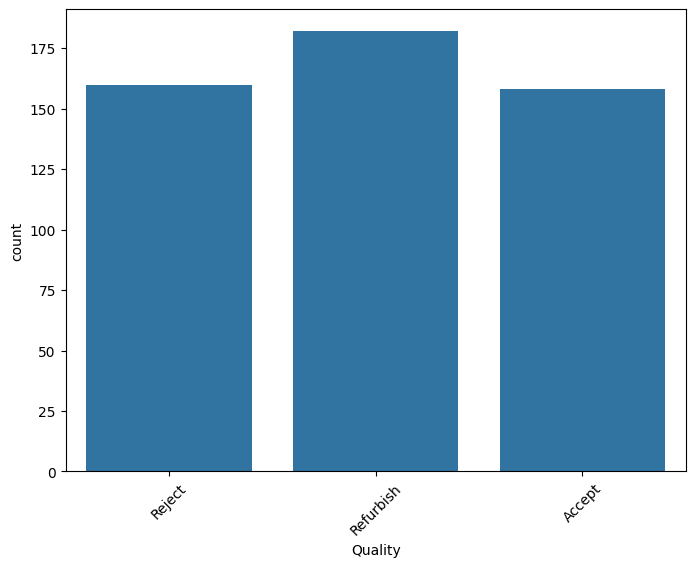

In [78]:
# seu código

from sklearn.preprocessing import StandardScaler

# Criando uma cópia do DataFrame antes da normalização
df_com_hot_encoding_copia = df_com_hot_encoding2.copy()

# Selecionando as variáveis para normalização
colunas_para_normalizar = ['A', 'B', 'C', 'D', 'Unit_0', 'Unit_1', 'Unit_2']

# Inicializando o StandardScaler
scaler = StandardScaler()

# Normalizando as variáveis selecionadas
df_com_hot_encoding2[colunas_para_normalizar] = scaler.fit_transform(df_com_hot_encoding2[colunas_para_normalizar])

# Calculando a média das variáveis normalizadas
media_normalizadas = df_com_hot_encoding2[colunas_para_normalizar].mean()
print("\nMédia das variáveis normalizadas:")
print(media_normalizadas)

# Realizando uma nova análise exploratória no novo DataFrame normalizado
print("\nAnálise Exploratória do Novo DataFrame Normalizado:")
print(df_com_hot_encoding2.describe())

# Histogramas das variáveis normalizadas
df_com_hot_encoding2[colunas_para_normalizar].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplots das variáveis normalizadas
df_com_hot_encoding2[colunas_para_normalizar].boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Contagem de valores das variáveis categóricas (caso ainda existam)
for column in df_com_hot_encoding2.select_dtypes(include='object'):
    print(df_com_hot_encoding2[column].value_counts())

# Gráfico de barras das variáveis categóricas (caso ainda existam)
for column in df_com_hot_encoding2.select_dtypes(include='object'):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_com_hot_encoding2, x=column)
    plt.xticks(rotation=45)
    plt.show()




In [ ]:
# Calculando o primeiro quartil (Q1) e o terceiro quartil (Q3) da variável 'B'
#Q1_B = df_com_hot_encoding2['B'].quantile(0.25)
#Q3_B = df_com_hot_encoding2['B'].quantile(0.75)

# Calculando o intervalo interquartil (IQR) para 'B'
#IQR_B = Q3_B - Q1_B

# Definindo os limites inferior e superior para identificar outliers em 'B'
#limite_inferior_B = Q1_B - 1.5 * IQR_B
#limite_superior_B = Q3_B + 1.5 * IQR_B

# Removendo os outliers da variável 'B'
#df_sem_outliers_B = df_com_hot_encoding2[(df_com_hot_encoding2['B'] >= limite_inferior_B) & (df_com_hot_encoding2['B'] <= limite_superior_B)]

# Calculando o primeiro quartil (Q1) e o terceiro quartil (Q3) da variável 'Unit_1'
#Q1_Unit_1 = df_sem_outliers_B['Unit_1'].quantile(0.25)
#Q3_Unit_1 = df_sem_outliers_B['Unit_1'].quantile(0.75)

# Calculando o intervalo interquartil (IQR) para 'Unit_1'
#IQR_Unit_1 = Q3_Unit_1 - Q1_Unit_1

# Definindo os limites inferior e superior para identificar outliers em 'Unit_1'
#limite_inferior_Unit_1 = Q1_Unit_1 - 1.5 * IQR_Unit_1
#limite_superior_Unit_1 = Q3_Unit_1 + 1.5 * IQR_Unit_1

# Removendo os outliers da variável 'Unit_1'
#df_sem_outliers_B_Unit_1 = df_sem_outliers_B[(df_sem_outliers_B['Unit_1'] >= limite_inferior_Unit_1) & (df_sem_outliers_B['Unit_1'] <= limite_superior_Unit_1)]

# Verificando o número de linhas antes e depois da remoção dos outliers
#print("Número de linhas antes da remoção de outliers:", df_com_hot_encoding2.shape[0])
#print("Número de linhas depois da remoção de outliers de B e Unit_1:", df_sem_outliers_B_Unit_1.shape[0])
#display(df_sem_outliers_B_Unit_1)


(Moodle) **Q1**. Após todas as transformações a soma dos valores absolutos ( `np.abs()` ) dos atributos referentes ao hot encode dos *BH*, *RJ* e *SP* são respectivamente?

*Empregue esta pergunta como ponto de checagem das suas transformações. Se não encontrar os seus valores dentre as alternativas há provavelmente um erro e você deve revisar as transformações.*

In [79]:
# seu código
import numpy as np

# Atribuindo o DataFrame com os outliers removidos à variável df_novo
df_novo = df_com_hot_encoding2

# Calculando a soma absoluta das variáveis Unit_0, Unit_1 e Unit_2 usando a função np.abs()
soma_absoluta_unit = np.abs(df_novo[['Unit_0', 'Unit_1', 'Unit_2']]).sum()

# Exibindo o resultado
print("Soma absoluta das variáveis Unit_0, Unit_1 e Unit_2:")
print(soma_absoluta_unit)


Soma absoluta das variáveis Unit_0, Unit_1 e Unit_2:
Unit_0    459.125255
Unit_1    433.012702
Unit_2    497.288649
dtype: float64


### Conjuntos de Treinamento e Teste

Separe os dados de treinamento e teste (30%, estratificados pela variável objetivo e com random_state = 1984). Não empregue outros parâmetros não solicitados.


In [80]:
# seu código

from sklearn.model_selection import train_test_split

# Definindo as features (X) e o target (y)
X = df_com_hot_encoding2.drop(columns=['Quality'])
y = df_com_hot_encoding2['Quality']

# Separando os dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1984)

# Imprimindo as dimensões dos conjuntos de treinamento e teste
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)




(350, 7) (150, 7) (350,) (150,)


# K-Vizinhos mais Próximos

Empregue o `GridSearchCV` com 5 partições e `scoring='accuracy'` para encontrar o melhor modelo entre os valores de $k$ de $4$ a $11$ e empregando as métricas euclidiana e manhattan. Verifique o modelo obtidos e o `classification_report` desse modelo.

Você pode querer empregar o modelo de código no final desse notebook que faz a mesma construção para Árvores de Decisão.

In [81]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [55]:
# seu código

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definindo os parâmetros para GridSearchCV
param_grid = {
    'n_neighbors': range(4, 12),
    'metric': ['euclidean', 'manhattan']
}

# Inicializando o classificador KNeighbors
knn = KNeighborsClassifier()
print('Inicializando o classificador KNeighbors')
print(knn)
print('==================================================================')
print()
# Inicializando o GridSearchCV
clf = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
print('Inicializando o GridSearchCV')
print(clf)
print('==================================================================')
print()
# Treinando o GridSearchCV
clf.fit(X_train, y_train)
print('Treinando o GridSearchCV')
print(clf)
print('===================================================================')
print()
# Exibindo o melhor modelo
print("Melhor modelo encontrado:")
print(clf.best_estimator_)
print('===================================================================')
print()

# Imprimindo o classification_report do melhor modelo
print("Relatório de Classificação:")
print('===================================================================')
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()



Inicializando o classificador KNeighbors
KNeighborsClassifier()

Inicializando o GridSearchCV
GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(4, 12)},
             scoring='accuracy')

Treinando o GridSearchCV
GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': range(4, 12)},
             scoring='accuracy')

Melhor modelo encontrado:
KNeighborsClassifier(metric='manhattan', n_neighbors=7)

Relatório de Classificação:

              precision    recall  f1-score   support

      Accept       0.88      0.98      0.93        47
   Refurbish       0.98      0.89      0.93        55
      Reject       1.00      1.00      1.00        48

    accuracy                           0.95       150
   macro avg       0.95      0.96      0.95       150
weighted avg       0.96      0.95

(Moodle) **Q2** Qual o melhor modelo de Knn obtido e qual a sua acuracidade?

(Moodle) **Q3** Qual classe teve os elementos mais erroneamente classificados?

In [56]:
# Acurácia do melhor modelo
melhor_modelo = clf.best_estimator_
# Acessar a pontuação média de validação cruzada para o melhor conjunto de parâmetros
acuracia_melhor_modelo = clf.best_score_

print("O melhor modelo de KNN encontrado foi:")
print(melhor_modelo)
print("A acurácia do melhor modelo é:", acuracia_melhor_modelo)
print()

# Predições do conjunto de teste
y_pred = clf.predict(X_test)

print(y_pred)

# Relatório de classificação
relatorio_classificacao = classification_report(y_test, y_pred, output_dict=True)

# Identificando a classe com mais elementos erroneamente classificados
classes = list(relatorio_classificacao.keys())[:-3]  # Excluindo 'accuracy', 'macro avg' e 'weighted avg'
erros_por_classe = {classe: relatorio_classificacao[classe]['f1-score'] for classe in classes}
classe_max_erros = max(erros_por_classe, key=erros_por_classe.get)
elementos_erroneamente_classificados = erros_por_classe[classe_max_erros]

print("A classe que teve mais elementos erroneamente classificados foi:", classe_max_erros)
print("Quantidade de elementos erroneamente classificados:", elementos_erroneamente_classificados)


O melhor modelo de KNN encontrado foi:
KNeighborsClassifier(metric='manhattan', n_neighbors=7)
A acurácia do melhor modelo é: 0.9657142857142859

['Accept' 'Reject' 'Refurbish' 'Reject' 'Accept' 'Refurbish' 'Reject'
 'Reject' 'Accept' 'Accept' 'Accept' 'Accept' 'Accept' 'Refurbish'
 'Refurbish' 'Accept' 'Refurbish' 'Refurbish' 'Reject' 'Reject' 'Reject'
 'Reject' 'Accept' 'Refurbish' 'Accept' 'Refurbish' 'Accept' 'Refurbish'
 'Accept' 'Accept' 'Reject' 'Refurbish' 'Accept' 'Accept' 'Reject'
 'Refurbish' 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Refurbish'
 'Reject' 'Reject' 'Reject' 'Reject' 'Refurbish' 'Reject' 'Refurbish'
 'Reject' 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Accept' 'Accept'
 'Reject' 'Refurbish' 'Refurbish' 'Reject' 'Refurbish' 'Reject' 'Accept'
 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Accept' 'Refurbish'
 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Accept' 'Refurbish' 'Reject'
 'Refurbish' 'Reject' 'Refurbish' 'Accept' 'Reject' 'Accept' 'Refurbish'
 'Accept' 'Acc

In [57]:
from sklearn.metrics import confusion_matrix

# Supondo que y_test são os rótulos reais e y_pred_knn são as previsões do modelo KNN
matriz_confusao_knn = confusion_matrix(y_test, y_pred)

print("Matriz de Confusão do KNN:")
print(matriz_confusao_knn)

Matriz de Confusão do KNN:
[[46  1  0]
 [ 6 49  0]
 [ 0  0 48]]


# Regressão Logística

Empregue o `GridSearchCV` com 5 partições e `scoring='accuracy'` para avaliar o modelo de regressão logística. Empregue somente os parâmetros padrão do `sciki-learn` para regressão logística, para isso basta empregar `param_grid = {}`. Verifique os resultados obtidos desse modelo com o `classification_report`.

Você pode querer empregar o modelo de código no final desse notebook que faz a mesma construção para Árvores de Decisão.

In [58]:
from sklearn.linear_model import LogisticRegression
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [59]:
# seu código
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Definindo os parâmetros para GridSearchCV
param_grid = {}

# Inicializando o classificador LogisticRegression
logistic_regression = LogisticRegression()

# Inicializando o GridSearchCV
clf = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Treinando o GridSearchCV
clf.fit(X_train, y_train)

# Exibindo o melhor modelo
print("Melhor modelo encontrado:")
print(clf.best_estimator_)
print()

# Imprimindo o classification_report do melhor modelo
print("Relatório de Classificação:")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()


Melhor modelo encontrado:
LogisticRegression()

Relatório de Classificação:

              precision    recall  f1-score   support

      Accept       0.92      1.00      0.96        47
   Refurbish       1.00      0.93      0.96        55
      Reject       1.00      1.00      1.00        48

    accuracy                           0.97       150
   macro avg       0.97      0.98      0.97       150
weighted avg       0.98      0.97      0.97       150




(Moodle) **Q4** Qual a acuracidade do modelo de regressão logística e qual classe teve mais falsos positivos?

In [82]:
# Acurácia do melhor modelo
melhor_modelo_logistic_regression = clf.best_estimator_
acuracia_melhor_modelo_logistic_regression = clf.best_score_

print("A acurácia do melhor modelo de Regressão Logística encontrado é:", acuracia_melhor_modelo_logistic_regression)
print()

# Predições do conjunto de teste
y_pred_logistic_regression = clf.predict(X_test)
print(y_pred_logistic_regression)

# Relatório de classificação
relatorio_classificacao_logistic_regression = classification_report(y_test, y_pred_logistic_regression)

print("Relatório de Classificação:")
print(relatorio_classificacao_logistic_regression)
print()

# Identificando a classe com mais falsos positivos
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y_test, y_pred_logistic_regression)
print('=======================================================')

print(matriz_confusao)
print()
print('=======================================================')
falsos_positivos_por_classe = {}
for i in range(matriz_confusao.shape[0]):
    fp = matriz_confusao.sum(axis=0)[i] - matriz_confusao[i][i]
    falsos_positivos_por_classe[i] = fp

classe_max_falsos_positivos = max(falsos_positivos_por_classe, key=falsos_positivos_por_classe.get)
falsos_positivos = falsos_positivos_por_classe[classe_max_falsos_positivos]

print("A classe que teve mais falsos positivos foi:", classe_max_falsos_positivos)
print("Quantidade de falsos positivos:", falsos_positivos)


A acurácia do melhor modelo de Regressão Logística encontrado é: 0.9800000000000001

['Accept' 'Reject' 'Refurbish' 'Reject' 'Accept' 'Refurbish' 'Reject'
 'Reject' 'Accept' 'Accept' 'Accept' 'Accept' 'Accept' 'Refurbish'
 'Refurbish' 'Accept' 'Refurbish' 'Refurbish' 'Reject' 'Reject' 'Reject'
 'Reject' 'Accept' 'Refurbish' 'Accept' 'Refurbish' 'Accept' 'Refurbish'
 'Accept' 'Accept' 'Reject' 'Refurbish' 'Accept' 'Accept' 'Reject'
 'Accept' 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Refurbish' 'Reject'
 'Reject' 'Reject' 'Reject' 'Refurbish' 'Reject' 'Refurbish' 'Reject'
 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Accept' 'Accept' 'Reject'
 'Refurbish' 'Refurbish' 'Reject' 'Refurbish' 'Reject' 'Accept'
 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Accept' 'Refurbish'
 'Refurbish' 'Refurbish' 'Reject' 'Accept' 'Accept' 'Refurbish' 'Reject'
 'Refurbish' 'Reject' 'Refurbish' 'Accept' 'Reject' 'Accept' 'Refurbish'
 'Accept' 'Accept' 'Refurbish' 'Accept' 'Accept' 'Refurbish' 'Reject'
 'Accept

# Aplicando o melhor Modelo

Empregue o melhor modelo obtido acima para estimar a qualidade das peças das 10 peças do conjunto abaixo.

In [85]:
df_new = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/pieces_new.csv')
display (df_new)

,id,A,B,C,D,Unit
0,182,5.5,2.6,4.4,1.2,SP
1,345,5.8,2.7,4.1,1.0,SP
2,42,5.1,3.5,1.4,0.2,SP
3,37,6.3,2.5,4.9,1.5,BH
4,61,6.0,3.0,4.8,1.8,RJ


Primeiras linhas do DataFrame:
    id    A    B    C    D Unit
0  182  5.5  2.6  4.4  1.2   SP
1  345  5.8  2.7  4.1  1.0   SP
2   42  5.1  3.5  1.4  0.2   SP
3   37  6.3  2.5  4.9  1.5   BH
4   61  6.0  3.0  4.8  1.8   RJ

Sumário estatístico:
               id         A         B         C        D
count    5.000000  5.000000  5.000000  5.000000  5.00000
mean   133.400000  5.740000  2.860000  3.920000  1.14000
std    132.311375  0.461519  0.403733  1.444645  0.60663
min     37.000000  5.100000  2.500000  1.400000  0.20000
25%     42.000000  5.500000  2.600000  4.100000  1.00000
50%     61.000000  5.800000  2.700000  4.400000  1.20000
75%    182.000000  6.000000  3.000000  4.800000  1.50000
max    345.000000  6.300000  3.500000  4.900000  1.80000

Valores ausentes:
id      0
A       0
B       0
C       0
D       0
Unit    0
dtype: int64


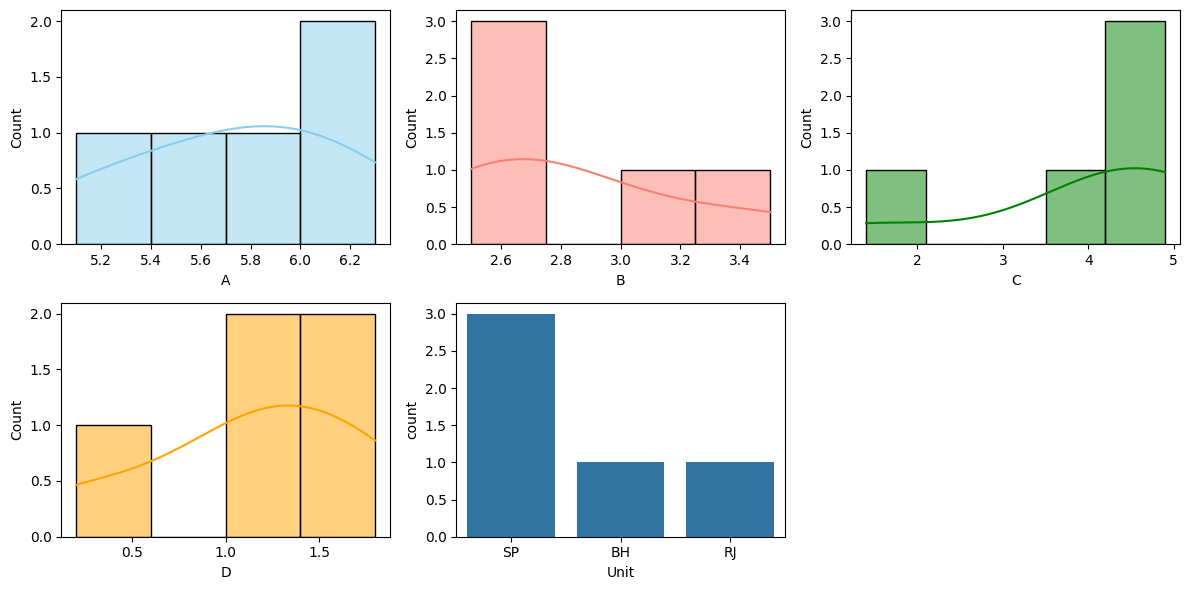

In [86]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Verificar as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df_new.head())

# 2. Sumarizar estatísticas descritivas
print("\nSumário estatístico:")
print(df_new.describe())

# 3. Verificar a presença de valores ausentes
print("\nValores ausentes:")
print(df_new.isnull().sum())

# 4. Visualizar a distribuição das variáveis numéricas
plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1)
sns.histplot(df_new['A'], kde=True, color='skyblue')
plt.subplot(2, 3, 2)
sns.histplot(df_new['B'], kde=True, color='salmon')
plt.subplot(2, 3, 3)
sns.histplot(df_new['C'], kde=True, color='green')
plt.subplot(2, 3, 4)
sns.histplot(df_new['D'], kde=True, color='orange')

# 5. Explorar a distribuição das variáveis categóricas
plt.subplot(2, 3, 5)
sns.countplot(data=df_new, x='Unit')

plt.tight_layout()
plt.show()


## Preparação dos Dados

Lembre-se, as mesmas operações feitas com os dados de treinamento precisarão ser feitas aqui também.

### Seleção de Atributos

In [87]:
# seu código

df_new = df_new.drop(columns=['id'] )
df_new

,A,B,C,D,Unit
0,5.5,2.6,4.4,1.2,SP
1,5.8,2.7,4.1,1.0,SP
2,5.1,3.5,1.4,0.2,SP
3,6.3,2.5,4.9,1.5,BH
4,6.0,3.0,4.8,1.8,RJ


### Hot encode  

In [88]:
# seu código


from sklearn.preprocessing import OneHotEncoder

# Inicializar e ajustar o codificador one-hot
hot_encode = OneHotEncoder()
hot_encode = hot_encode.fit(df_new[['Unit']])

# Exibir as categorias aprendidas pelo codificador one-hot
print("Categorias aprendidas pelo codificador one-hot:")
print(hot_encode.categories_)
print()

# Transformar a variável categórica 'Unit' em representação one-hot e concatenar com o DataFrame original
df_new = pd.concat([df_new.drop(columns='Unit'), pd.DataFrame(hot_encode.transform(df_new[['Unit']]).toarray(), columns=list(hot_encode.categories_[0]))], axis=1)

# Exibir as primeiras linhas do DataFrame após o hot encoding
print("DataFrame após hot encoding:")
df_new


Categorias aprendidas pelo codificador one-hot:
[array(['BH', 'RJ', 'SP'], dtype=object)]

DataFrame após hot encoding:


,A,B,C,D,BH,RJ,SP
0,5.5,2.6,4.4,1.2,0.0,0.0,1.0
1,5.8,2.7,4.1,1.0,0.0,0.0,1.0
2,5.1,3.5,1.4,0.2,0.0,0.0,1.0
3,6.3,2.5,4.9,1.5,1.0,0.0,0.0
4,6.0,3.0,4.8,1.8,0.0,1.0,0.0


### Normalize os dados

In [91]:
# seu código

from sklearn.preprocessing import StandardScaler

# Selecionar as variáveis para normalização
colunas_para_normalizar = ['A', 'B', 'C', 'D', 'BH', 'RJ', 'SP']

# Inicializar o StandardScaler
scaler = StandardScaler()

# Normalizar as variáveis selecionadas
df_new[colunas_para_normalizar] = scaler.fit_transform(df_new[colunas_para_normalizar])

# Exibir as primeiras linhas do DataFrame após a normalização
print("DataFrame após a normalização:")
# Renomear as colunas
df_new = df_new.rename(columns={'BH': 'Unit_0', 'RJ': 'Unit_1', 'SP': 'Unit_2'})

# Exibir as primeiras linhas do DataFrame após a renomeação
print("DataFrame após a renomeação das colunas:")
print(df_new.head())
df_new


DataFrame após a normalização:
DataFrame após a renomeação das colunas:
          A         B         C         D  Unit_0  Unit_1    Unit_2
0 -0.581402 -0.720003  0.371480  0.110581    -0.5    -0.5  0.816497
1  0.145350 -0.443079  0.139305 -0.258023    -0.5    -0.5  0.816497
2 -1.550405  1.772316 -1.950268 -1.732443    -0.5    -0.5  0.816497
3  1.356604 -0.996928  0.758438  0.663489     2.0    -0.5 -1.224745
4  0.629852  0.387694  0.681046  1.216396    -0.5     2.0 -1.224745


,A,B,C,D,Unit_0,Unit_1,Unit_2
0,-0.581402,-0.720003,0.371480,0.110581,-0.5,-0.5,0.816497
1,0.145350,-0.443079,0.139305,-0.258023,-0.5,-0.5,0.816497
2,-1.550405,1.772316,-1.950268,-1.732443,-0.5,-0.5,0.816497
3,1.356604,-0.996928,0.758438,0.663489,2.0,-0.5,-1.224745
4,0.629852,0.387694,0.681046,1.216396,-0.5,2.0,-1.224745


## Predição

In [94]:
# seu código

#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report

#clf = ...

#clf.fit(...)

#y_pred = ...

#df_new['Prediction'] = ...

#df_new
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
# 1. Garantir que os dados de teste estejam no mesmo formato que os dados de treinamento
# Certifique-se de que os dados de teste estejam nas mesmas colunas que os dados de treinamento
X_new = df_com_hot_encoding2.drop(columns=['Quality'])

# 2. Fazer previsões usando o melhor modelo
y_pred_new = melhor_modelo.predict(X_new)

# Exibir as previsões
print("Primeiras 10 previsões sobre a qualidade das peças:")
print(y_pred_new[:10])



Primeiras 10 previsões sobre a qualidade das peças:
['Reject' 'Reject' 'Refurbish' 'Refurbish' 'Reject' 'Refurbish' 'Accept'
 'Refurbish' 'Reject' 'Accept']


(Moodle) **Q5** Quais as classes obtidas com o melhor modelo para os cinco novos casos?

# Apêndice: Árvore de Decisão (RESOLVIDO)

Este é apenas um exemplo empregando o `GridSearchCV` com 5 partições e `scoring='accuracy'` para avaliar um modelo de Árvore de Decisão com diferentes parâmetros. Você irá estudar mais detalhtes do modelo de Árvore de Decisão na próxima trilha. Mas ele é um classificador, assim como o modelo de K-Vizinhos mais Próximos e a Regressão Logística, e o uso desse estimador segue os mesmos moldes desses estimadores. Você pode assim aplicá-lo do mesmo modo.

In [95]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [96]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

base_estimator = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [ None, 3 ]}

clf = GridSearchCV(base_estimator, param_grid, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

# print(clf.cv_results_)
print(clf.best_estimator_)

print()
print("Detailed classification report:")
print()
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print()

DecisionTreeClassifier()

Detailed classification report:

              precision    recall  f1-score   support

      Accept       1.00      1.00      1.00        47
   Refurbish       1.00      1.00      1.00        55
      Reject       1.00      1.00      1.00        48

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150


